<a href="https://colab.research.google.com/github/brunodleite/case_maringa/blob/main/case_timeflorestal_maringa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# O relatório está disponível na plataforma gratuita do Tableau no link abaixo.

## [Relatório Maringá - Tableau](https://public.tableau.com/views/case_maring/RelatrioMaring?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)

# Importando as bibliotecas

In [3]:
#import das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Obtenção dos dados

<center><img alt="Grupo Maringá" width="10%" src="https://media-exp1.licdn.com/dms/image/C4E0BAQEM2Z0TGPYnBA/company-logo_200_200/0/1574102737485?e=2159024400&v=beta&t=wkvpUzlPGVxUmqpMVOaam9QM7_MhcAWNuHCJnVUgKvM"></center>

Os dados utlizados neste case foram obtidos através do **Time Florestal** da empresa **Maringá Ferro Liga S/**A. O time é responsável pela gestão das florestas plantadas e produção de biorredutores utilizados como matéria prima da companhia para fabricação de ferro ligas, contando com uma ampla rede de informações desde o plantio e acompanhamento das florestas, corte, transporte e carbonização da madeira para produção de biorredutores. 

Algumas fontes de pesquisa: 

*   [Fonte 1](https://www.scielo.br/j/rarv/a/jWfkNZsRWMqMrNbDbbtzz4g/?format=pdf&lang=pt)
*   [Fonte 2](https://www.viflona.com.br/p/beneficial-book/)
*   [Fonte 3](https://revistas.ufpr.br/biofix/article/view/67394)
*   [Fonte 4](https://edisciplinas.usp.br/pluginfile.php/3114315/mod_resource/content/1/energia%20%20sid%202017.pdf)




Para análise inicial, foi utilizado os dados disponibilizados pela empresa:


*   base_de_dados.xlsx



In [4]:
dados = "base_de_dados.xlsx"
df = pd.read_excel(dados)

# Análise dos dados


**Dicionário das variáveis**


*   `Data`
*   `UPR` - Unidade de produção de Bio-Redutor
*   `Fazenda` - Localização das fazendas com plantações de árvores
*   `Talhão` - Área subdividida de *n* árvores
*   `Espécie` - Espécie da árvore
*   `Idade` - Idade da árvore
*   `Dias de secagem` - Quantidade de dias de secagem ao ar livre
*   `Madeira` - Volume (m³) 
*   `Tiço Enfornado` - Pedaços de madeira não transformado em carvão dentro do forno (m³)
*   `Tiço Gerado` - Pedaços de madeira não transformado em carvão após o processo (m³)
*   `Produção` - Produção de bio-redutor em (toneladas)
*   `Densidade` - Densidade da madeira* 
*   `Finos` - Resíduo pós processo
*    `Umidade` - Umidade da madeira*
*    `CF` - Porcentagem de Carbono Fixo




Antes de iniciar a análise, vamos verificar de modo aleatório, como algumas entradas do dataset estão dispostas.

In [5]:
# Verificando uma amostra aleatória com 10 entradas
df.sample(10)

,Data,UPR,Fazenda,Talhão,Espécie,Idade,Dias Secagem,Madeira,Tiço Enfornado,Tiço Gerado,Produção,Densidade,Finos,Umidade,CF %,Comprimento
2463,2020-03-01,Maringá Retangular,Alba,5,Clone Urograndis I 144,8.77,463.0,93.23,4.82,4.32,10.44,248.21,11.09,5.28,82.46,NaN
2355,2020-02-01,Tamanduá,Fecho,37,Clone Saligna 2864,8.6,202.0,34.95,3.88,4.15,3.77,252.87,11.12,7.11,74.19,NaN
2217,2020-01-01,Tamanduá,Tamanduá,86,Clone Saligna 2864,9.79,300.0,369.75,49.03,40.33,42.72,265.11,11.56,6.55,77.30,NaN
1471,2019-08-01,Butiá,butiá,73,Clone Urograndis 2361,7.29,338.0,168.8,18.77,19.95,15.75,238.91,9.69,4.87,77.48,NaN
1159,2019-07-01,Tamanduá,Fecho,27,Clone Saligna 2864,9.02,93.0,172.48,14.65,21.31,16.41,255.53,10.82,6.15,80.36,NaN
580,2019-04-01,Butiá,Butiá,64,-,7.22,447.0,169.43,19.89,16.57,15.30,240.06,9.88,4.38,80.31,NaN
565,2019-04-01,Tamanduá,Dona Rita,18,-,9.43,268.0,179.57,17.32,14,22.02,255.43,10.66,4.85,77.83,NaN
3686,2020-11-01,Butiá,Butiá,75,Clone Urograndis 2361,8.34,206.0,159.25,22.9,22.82,18.86,238.84,10.42,5.63,75.93,NaN
3071,2020-07-01,Butiá,Elizael,Elizael,Diversos,6.92,42.0,68.65,12.73,13.12,8.80,245.82,10.70,4.44,79.69,NaN
2482,2020-03-01,Tamanduá,Fecho,45,Clone Saligna 2864,8.46,208.0,230.97,35.28,41.28,26.50,254.94,10.39,5.79,77.06,NaN


## Verificação das variáveis e entradas que o dataset possui.
Nosso dataframe é composto por **16 variáveis** e **3731 entradas**. As variáveis são do tipo: `int64`, `object`, `float64` e `datetime64[ns]`.

In [6]:
# identificação do volume de dados do DataFrame
print("Qtd de variáveis: \t {}".format(df.shape[1]))
print("Qtd de entradas:\t {}\n".format(df.shape[0]))

# verificação dos tipos de variáveis que compõe o dataframe
display(df.dtypes)

Qtd de variáveis: 	 16
Qtd de entradas:	 3731



Data              datetime64[ns]
UPR                       object
Fazenda                   object
Talhão                    object
Espécie                   object
Idade                     object
Dias Secagem             float64
Madeira                   object
Tiço Enfornado            object
Tiço Gerado               object
Produção                 float64
Densidade                float64
Finos                    float64
Umidade                  float64
CF %                     float64
Comprimento               object
dtype: object

## Verificação dos valores ausentes

Podemos verificar que a variável `Comprimento` possui aproximadamente **97%** de suas entradas ausentes. 

Em relação às variáveis `Densidade`, `Finos`, `Umidade` e `Dias Secagem` será realizado uma **verificação mais profunda**, devido aos seus valores não possuirem uma quantidade significativa de valores ausentes.

In [7]:
# ordenando em ordem decrescente as variáveis através dos seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

Comprimento       0.968373
Densidade         0.005360
Finos             0.005360
Umidade           0.005360
Dias Secagem      0.000536
Data              0.000000
UPR               0.000000
Fazenda           0.000000
Talhão            0.000000
Espécie           0.000000
Idade             0.000000
Madeira           0.000000
Tiço Enfornado    0.000000
Tiço Gerado       0.000000
Produção          0.000000
CF %              0.000000
dtype: float64

## Tratamento das entradas da variável `Comprimento`

Realizando algumas verificações nas entradas, desconsiderando os valores NaN. Devido a variável possuir aproximadamente 97% dos valores ausentes, será excluída a coluna inteira para não afetar as análises finais.

In [8]:
# Verificando as 5 primeiras entradas
df.Comprimento.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Comprimento, dtype: object

In [9]:
# Verificando a quantidade cada valor atribuido, sem consideram os valores NaN
df.Comprimento.value_counts()

3                                                                 36
3.3                                                               30
5                                                                 29
3,3m                                                               9
5,0m                                                               8
5.5                                                                4
*Consumo dos fornos de sexta e de quinta que ficaram pata trás     1
Estimado                                                           1
Name: Comprimento, dtype: int64

In [10]:
print("Dataframe antes da exclusão da variável Comprimento\n")
df.head()

Dataframe antes da exclusão da variável Comprimento



,Data,UPR,Fazenda,Talhão,Espécie,Idade,Dias Secagem,Madeira,Tiço Enfornado,Tiço Gerado,Produção,Densidade,Finos,Umidade,CF %,Comprimento
0,2019-01-01,Maringá,Maringá II,67,-,10.66,161.0,476.83,56.1,65.29,61.91,268.82,10.57,5.05,78.03,NaN
1,2019-01-01,Maringá,Maringá II,67,-,10.66,162.0,483.2,55.4,63.71,61.68,268.82,10.57,5.05,78.03,NaN
2,2019-01-01,Maringá,Maringá II,67,-,10.66,163.0,487.6,53.5,60,60.39,268.82,10.57,5.05,78.03,NaN
3,2019-01-01,Maringá,Maringá II,67,-,10.66,166.0,460.27,44.69,46.34,56.49,268.82,10.57,5.05,78.03,NaN
4,2019-01-01,Maringá,Maringá II,67,-,10.66,167.0,477.35,58.71,66.08,60.00,268.82,10.57,5.05,78.03,NaN


In [11]:
# Criando um cópia do dataframe
df_clean = df.copy()
# Excluindo a variável Comprimento
print("Dataframe após exclusão da variável Comprimento\n")
df_clean.drop(["Comprimento"], axis=1, inplace=True)
df_clean.head()

Dataframe após exclusão da variável Comprimento



,Data,UPR,Fazenda,Talhão,Espécie,Idade,Dias Secagem,Madeira,Tiço Enfornado,Tiço Gerado,Produção,Densidade,Finos,Umidade,CF %
0,2019-01-01,Maringá,Maringá II,67,-,10.66,161.0,476.83,56.1,65.29,61.91,268.82,10.57,5.05,78.03
1,2019-01-01,Maringá,Maringá II,67,-,10.66,162.0,483.2,55.4,63.71,61.68,268.82,10.57,5.05,78.03
2,2019-01-01,Maringá,Maringá II,67,-,10.66,163.0,487.6,53.5,60,60.39,268.82,10.57,5.05,78.03
3,2019-01-01,Maringá,Maringá II,67,-,10.66,166.0,460.27,44.69,46.34,56.49,268.82,10.57,5.05,78.03
4,2019-01-01,Maringá,Maringá II,67,-,10.66,167.0,477.35,58.71,66.08,60.00,268.82,10.57,5.05,78.03


## Tratamento das entradas da variável `Talhão`

A variável `Talhão` não será utilizada nesta análise, sendo assim será realizado a remoção da variável.

In [12]:
# Excluindo a variável Talhão
print("Dataframe após exclusão da variável Talhão\n")
df_clean.drop(["Talhão"], axis=1, inplace=True)
df_clean.head()

Dataframe após exclusão da variável Talhão



,Data,UPR,Fazenda,Espécie,Idade,Dias Secagem,Madeira,Tiço Enfornado,Tiço Gerado,Produção,Densidade,Finos,Umidade,CF %
0,2019-01-01,Maringá,Maringá II,-,10.66,161.0,476.83,56.1,65.29,61.91,268.82,10.57,5.05,78.03
1,2019-01-01,Maringá,Maringá II,-,10.66,162.0,483.2,55.4,63.71,61.68,268.82,10.57,5.05,78.03
2,2019-01-01,Maringá,Maringá II,-,10.66,163.0,487.6,53.5,60,60.39,268.82,10.57,5.05,78.03
3,2019-01-01,Maringá,Maringá II,-,10.66,166.0,460.27,44.69,46.34,56.49,268.82,10.57,5.05,78.03
4,2019-01-01,Maringá,Maringá II,-,10.66,167.0,477.35,58.71,66.08,60.00,268.82,10.57,5.05,78.03


## Tratamento das entradas da variável `Densidade`

A variável Densidade possui cerca de 0.5% das suas entradas com valores ausentes. Nesse caso, será substituído pela média dos valores.

A partir da análise descritiva, verificamos que essa variável está razoalmente bem distribuida, pois **75% dos valores** estão próximos ao **valor da média**

In [13]:
# Análise descritiva da variável Densidade
df_clean.Densidade.describe()

count    3711.000000
mean      247.783269
std        16.662546
min         0.000000
25%       241.710000
50%       247.370000
75%       254.940000
max       272.630000
Name: Densidade, dtype: float64

In [14]:
# substituindo valores ausentes pela média da densidade
df_clean['Densidade'].fillna(df_clean['Densidade'].mean(), inplace=True)
print("Valores ausentes: ", df_clean['Densidade'].isna().sum())

Valores ausentes:  0


In [15]:
# Quantidade de valores ausentes no dataset original da variável Densidade
print("Valores ausentes: ", df['Densidade'].isna().sum())

Valores ausentes:  20


## Tratamento das entradas da variável `Finos`

A variável `Finos` possui cerca de 0.5% das suas entradas com valores ausentes. Nesse caso, será substituído pela média dos valores.

In [16]:
# Análise descritiva da variável Finos
df_clean.Finos.describe()

count    3711.000000
mean       10.612614
std         0.872033
min         0.000000
25%        10.240000
50%        10.630000
75%        10.960000
max        14.080000
Name: Finos, dtype: float64

In [17]:
# substituindo valores ausentes pela média da variável Finos
df_clean['Finos'].fillna(df_clean['Finos'].mean(), inplace=True)
print("Valores ausentes: ", df_clean['Finos'].isna().sum())

Valores ausentes:  0


In [18]:
# Quantidade de valores ausentes no dataset original da variável Finos
print("Valores ausentes: ", df['Finos'].isna().sum())

Valores ausentes:  20


## Tratamento das entradas da variável `Umidade`

A variável `Umidade` possui cerca de 0.5% das suas entradas com valores ausentes. Nesse caso, será substituído pela média dos valores.

In [19]:
# Análise descritiva da variável Umidade
df_clean.Umidade.describe()

count    3711.000000
mean        5.209510
std         1.042252
min         0.000000
25%         4.470000
50%         5.160000
75%         5.790000
max         9.910000
Name: Umidade, dtype: float64

In [20]:
# Substituindo valores ausentes pela média da variável Umidade
df_clean['Umidade'].fillna(df_clean['Umidade'].mean(), inplace=True)
print("Valores ausentes: ", df_clean['Umidade'].isna().sum())

Valores ausentes:  0


In [21]:
# Quantidade de valores ausentes no dataset original da variável Umidade
print("Valores ausentes: ", df['Umidade'].isna().sum())

Valores ausentes:  20


## Tratamento das entradas da variável `Dias Secagem`

A variável `Dias Secagem` possui cerca de 0.05% das suas entradas com valores ausentes. Nesse caso, será substituído pela média dos valores.

In [22]:
# Análise descritiva da variável Dias Secagem
df_clean['Dias Secagem'].describe()

count    3729.000000
mean      259.692947
std       131.466442
min         3.000000
25%       173.000000
50%       236.000000
75%       320.000000
max      1115.000000
Name: Dias Secagem, dtype: float64

In [23]:
# Substituindo valores ausentes pela média da variável Dias Secagem
df_clean['Dias Secagem'].fillna(df_clean['Dias Secagem'].mean(), inplace=True)
print("Valores ausentes: ", df_clean['Dias Secagem'].isna().sum())

Valores ausentes:  0


In [24]:
# Quantidade de valores ausentes no dataset original da variável Dias Secagem
print("Valores ausentes: ", df['Dias Secagem'].isna().sum())

Valores ausentes:  2


## Tratamento das entradas da variável `Espécie`

Observando os valores únicos do dataset, podemos verificar algumas entradas diferentes do usual. 

Algumas entradas possuem o **hífen (-)**, podendo corresponder a uma espécie desconhecida, que não foi atribuído ao dataset. Portanto, irei realizar a alteração do **hífen (-)** para **Não atribuído**. 


In [25]:
#Verificando os valores únicos da variável Espécie
df_clean['Espécie'].head()

0     -   
1     -   
2     -   
3     -   
4     -   
Name: Espécie, dtype: object

In [26]:
# Substituíndo as entradas da variável Espécie
df_clean['Espécie'].replace(to_replace=" -   ", value="Não Atribuído", inplace=True)
df_clean.head()

,Data,UPR,Fazenda,Espécie,Idade,Dias Secagem,Madeira,Tiço Enfornado,Tiço Gerado,Produção,Densidade,Finos,Umidade,CF %
0,2019-01-01,Maringá,Maringá II,Não Atribuído,10.66,161.0,476.83,56.1,65.29,61.91,268.82,10.57,5.05,78.03
1,2019-01-01,Maringá,Maringá II,Não Atribuído,10.66,162.0,483.2,55.4,63.71,61.68,268.82,10.57,5.05,78.03
2,2019-01-01,Maringá,Maringá II,Não Atribuído,10.66,163.0,487.6,53.5,60,60.39,268.82,10.57,5.05,78.03
3,2019-01-01,Maringá,Maringá II,Não Atribuído,10.66,166.0,460.27,44.69,46.34,56.49,268.82,10.57,5.05,78.03
4,2019-01-01,Maringá,Maringá II,Não Atribuído,10.66,167.0,477.35,58.71,66.08,60.00,268.82,10.57,5.05,78.03


## Tratamento das entradas da variável `Data`

É possível verificar que a variável `Data` está como modo númerico. A partir disso será realizado a conversão para o tipo **Datetime**, mostrando apenas **mês** e **ano**.

E por fim, manter a Data como index do dataframe.

In [27]:
#importando biblioteca datetime
from datetime import timedelta

#Conversão para Datetime e adicionando nova Data
df_clean['Data_2'] = pd.to_datetime(df_clean['Data'], format="%m00%Y").apply(lambda x: x.strftime('%m-%Y'))

In [28]:
df_clean.sample(10)

,Data,UPR,Fazenda,Espécie,Idade,Dias Secagem,Madeira,Tiço Enfornado,Tiço Gerado,Produção,Densidade,Finos,Umidade,CF %,Data_2
2932,2020-06-01,Butiá,RFC,Diversos,9.01,431.0,179.2,26.26,24.02,17.08,235.040000,11.020000,4.10000,76.31,06-2020
639,2019-04-01,Mato Dentro,Komiya,Não Atribuído,6.4,269.0,107.14,10.4,8.9,12.16,239.570000,10.670000,5.27000,78.97,04-2019
2870,2020-06-01,Maringá Retangular,Alba,Clone Urograndis 2361,8.91,542.0,115.67,2.18,9.08,12.10,240.310000,14.080000,4.63000,82.56,06-2020
2331,2020-02-01,Maringá,Alba,Clone Urograndis 2361,7.93,191.0,306.84,80.68,55.74,39.00,246.560000,10.800000,7.51000,74.28,02-2020
3080,2020-07-01,Ribeirão da Ilha,Ribeirão da Ilha,Clone Urograndis 2361,10.39,252.0,158.06,16.52,16.64,16.76,251.420000,11.230000,5.62000,74.90,07-2020
1324,2019-07-01,Mato Dentro,Komiya,Diversos,6.4,361.0,17.56,1.73,1.49,2.00,244.030000,10.500000,4.92000,79.39,07-2019
3644,2020-11-01,Maringá Retangular,Alba,Clone Urograndis 2361,7.82,370.0,105,14.72,10.5,12.34,247.783269,10.612614,5.20951,81.58,11-2020
1591,2019-09-01,Maringá Retangular,Alba,Clone Urograndis 2361,8.91,279.0,108.41,2.5,3,9.63,268.400000,10.220000,3.95000,83.26,09-2019
986,2019-06-01,Tamanduá,Tamanduá,Clone Urograndis GG100,9.93,81.0,70.3,7.56,6.81,6.97,261.900000,11.060000,5.87000,80.14,06-2019
3401,2020-10-01,Tamanduá,Fecho,Clone Urograndis 2361,7.82,362.0,33,5.3,5.74,4.28,244.520000,10.670000,5.20000,75.95,10-2020


In [29]:
#Removendo Data Original e Renomeando nova data no Tipo mês-ano
df_clean.drop(["Data"], axis=1, inplace=True)
rename_data = {'Data_2': 'Data'}
df_clean = df_clean.rename(columns=rename_data)

In [30]:
# Transformando a data em index
df_clean = df_clean.set_index('Data')

In [31]:
df_clean.head()

,UPR,Fazenda,Espécie,Idade,Dias Secagem,Madeira,Tiço Enfornado,Tiço Gerado,Produção,Densidade,Finos,Umidade,CF %
Data,,,,,,,,,,,,,
01-2019,Maringá,Maringá II,Não Atribuído,10.66,161.0,476.83,56.1,65.29,61.91,268.82,10.57,5.05,78.03
01-2019,Maringá,Maringá II,Não Atribuído,10.66,162.0,483.2,55.4,63.71,61.68,268.82,10.57,5.05,78.03
01-2019,Maringá,Maringá II,Não Atribuído,10.66,163.0,487.6,53.5,60,60.39,268.82,10.57,5.05,78.03
01-2019,Maringá,Maringá II,Não Atribuído,10.66,166.0,460.27,44.69,46.34,56.49,268.82,10.57,5.05,78.03
01-2019,Maringá,Maringá II,Não Atribuído,10.66,167.0,477.35,58.71,66.08,60.00,268.82,10.57,5.05,78.03


## Tratamento das entradas da variável `Idade`

Na variável idade, percebeu-se que existem valores vazios nas células, sendo assim foi realizado um laço com uma condição realizando a substituíção dos valores vazios por 0. Posteriormente os valores atribuídos 0 serão substituídos pela média.

In [32]:
for caracter in df_clean['Idade']:
  if caracter == '  ':
    print(caracter)
    df_clean['Idade'].replace(caracter, 0, inplace=True)

## Tratamento das entradas da variável `Madeira`

In [33]:
for caracter in df_clean['Madeira']:
  if caracter == ' -   ':
    print(caracter)
    df_clean['Madeira'].replace(caracter, 0, inplace=True)

 -   


In [34]:
for caracter in df_clean['Madeira']:
  if caracter == ' -   ':
    print(caracter)

## Tratamento das entradas da variável `Tiço Enfornado`

In [35]:
for caracter in df_clean['Tiço Enfornado']:
  if caracter == ' -   ':
    print(caracter)
    df_clean['Tiço Enfornado'].replace(caracter, 0, inplace=True)

 -   


In [36]:
for caracter in df_clean['Tiço Enfornado']:
  if caracter == ' -   ':
    print(caracter)

## Tratamento das entradas da variável `Tiço Gerado`

In [37]:
for caracter in df_clean['Tiço Gerado']:
  if caracter == ' -   ':
    print(caracter)
    df_clean['Tiço Gerado'].replace(caracter, 0, inplace=True)

 -   


In [38]:
for caracter in df_clean['Tiço Gerado']:
  if caracter == ' -   ':
    print(caracter)

## Substituindo os valores iguais a 0 para a média, nas variáveis: `Idade`, `Madeira`, `Tiço Enfornado` e Tiço Gerado

In [39]:
# substituindo valores ausentes pela média de cada respectiva
df_clean[['Idade','Madeira','Tiço Enfornado','Tiço Gerado']].fillna(df_clean[['Idade','Madeira','Tiço Enfornado','Tiço Gerado']].mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


# Extra - Simulador Simples

De modo simples, foi criado um modelo básico de Regressão Linear para a porcentagem de Carbono Fixo, com base nas variáveis de entrada abaixo. O intuito do modelo possibilita pensar em criar um novo produto, ou seja, possuindo muito mais variáveis e análises estatísticas aprofundadas, pode-se obter um modelo mais robusto.

O exemplo abaixo busca simular a quantidade de todas as variáveis envolvidas, com o objetivo de obter uma proporção ideal de carbono fixo.

### Convertendo as variáveis que seram utilizadas no simulador de %CF

In [40]:
#Conversão object para float
conversao_por_coluna = {"Idade": "float64",
            "Madeira": "float64",
            "Tiço Enfornado": "float64",
            "Tiço Gerado": "float64",
}
  
df_clean = df_clean.astype(conversao_por_coluna)

### Comportamento da variável `CF %` em relação às variáveis explicativas.

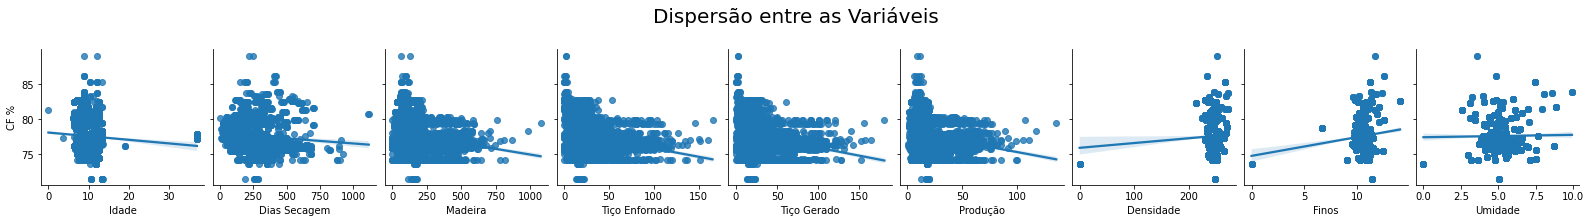

In [41]:
ax = sns.pairplot(df_clean, y_vars='CF %', x_vars=['Idade',	'Dias Secagem',	'Madeira',	'Tiço Enfornado',	'Tiço Gerado',	'Produção',	'Densidade',	'Finos',	'Umidade'], kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.2);

### Scikit Learn é uma biblioteca do Python voltado para modelos de machine learning. 

In [42]:
from sklearn.model_selection import train_test_split

Criando uma Series (pandas) para armazenar a % de Carbono Fixo (y)

In [43]:
y = df_clean['CF %']
y.shape

(3731,)

Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [44]:
X = df_clean[['Idade',	'Dias Secagem',	'Madeira',	'Tiço Enfornado',	'Tiço Gerado',	'Produção',	'Densidade',	'Finos',	'Umidade']]
X.shape

(3731, 9)

Criando os datasets de treino e de teste

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

Verificação dos tamanhos dos arquivos gerados pela função train_test_split

In [46]:
y_train.shape

(2611,)

In [47]:
X_train.shape

(2611, 9)

In [48]:
X_test.shape

(1120, 9)

In [49]:
X_train.shape[0] + X_test.shape[0]

3731

Importando LinearRegression e metrics da biblioteca scikit-learn

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Instanciando a classe LinearRegression()

In [51]:
model = LinearRegression()

Utilizando o método fit() do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

In [52]:
model.fit(X_train, y_train)

LinearRegression()

Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

In [53]:
print('R² = {}'.format(model.score(X_train, y_train).round(1)))

R² = 0.1


Gerando previsões para os dados de TESTE (X_test) utilizando o método predict() do objeto "modelo"

In [54]:
y_pred = model.predict(X_test)

Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

In [55]:
print('R² = %s' % metrics.r2_score(y_test, y_pred).round(1))

R² = 0.1


Obtendo Previsões Pontuais

In [56]:
#Dados de entrada
entrada = X_test[0:1]
entrada

,Idade,Dias Secagem,Madeira,Tiço Enfornado,Tiço Gerado,Produção,Densidade,Finos,Umidade
Data,,,,,,,,,
06-2019,9.44,128.0,35.2,4.31,3.76,4.29,261.9,11.06,5.87


Gerando previsão pontual

In [57]:
model.predict(entrada)[0]

78.16912818451097

Criando um simulador simples

In [58]:
#Simulador Simples
Idade=9.44
Dias_secagem=128.0
Madeira=35.2
Tiço_Enfornado=4.31
Tiço_Gerado=3.76
Produção=4.29
Densidade=261.9
Finos=11.06
Umidade=5.87

entrada=[[Idade, Dias_secagem, Madeira, Tiço_Enfornado, Tiço_Gerado, Produção, Densidade, Finos, Umidade]]
print('{} %CF'.format(model.predict(entrada)[0]))

78.16912818451097 %CF


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [59]:
Idade=100
Dias_secagem=50
Madeira=40
Tiço_Enfornado=10
Tiço_Gerado=3.76
Produção=4.29
Densidade=261.9
Finos=11.06
Umidade=5.87

entrada=[[Idade, Dias_secagem, Madeira, Tiço_Enfornado, Tiço_Gerado, Produção, Densidade, Finos, Umidade]]
print('{} %CF'.format(model.predict(entrada)[0]))

71.32301301481893 %CF


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
